In [1]:
from google.colab import files

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diwali Sales Data.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
# Two Columns named as 'Status', 'unnamed1' are entirely NULL.
# Most Columns are categorical column and Some columns are numerical.
# Like Amount Column has numerical values.

In [4]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [5]:
df.shape

(11251, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [ ]:
# Amount Column Have 12 null values but both status and unnamed1 columns have entirely null values.

In [8]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [9]:
df.shape

(11251, 13)

In [10]:
import numpy as np
mean = df['Amount'].mean()

In [11]:
mean

9453.610857727557

In [12]:
# Replacing Null Values of Amount Column with thier Mean Values.
df['Amount'] = df['Amount'].fillna(mean)

In [13]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
df[['Zone','State']].describe()

,Zone,State
count,11251,11251
unique,5,16
top,Central,Uttar Pradesh
freq,4296,1946


# EDA


### Gender

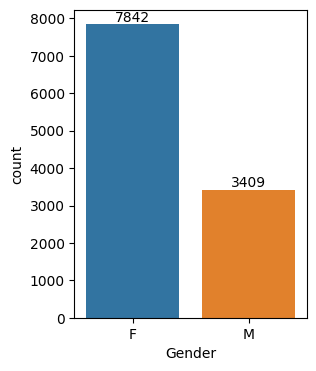

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Gender',data=df);

for bars in ax.containers:
  ax.bar_label(bars)

In [16]:
df['Amount'] = df['Amount'].astype('int')

In [17]:
df['Amount'].dtype

dtype('int64')

In [18]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

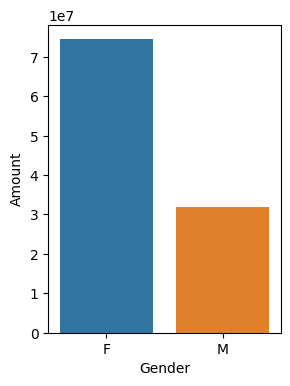

In [19]:
plt.figure(figsize=(3,4))
sns.barplot(x='Gender',y='Amount',data = sales_gen);

### State and Order

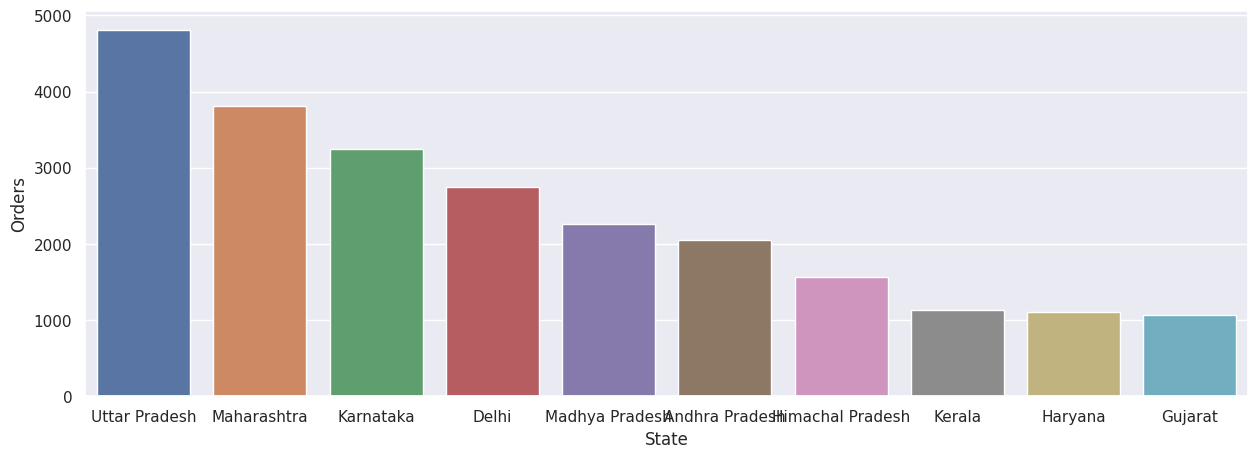

In [21]:
state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
#plt.rcParams['figure.figsize'] = (9, 5)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders',data= state);

### Observation: Uttar Pradesh, Maharashtra and Karnatka are top 3 states in terms of spending money on products.

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Age Group And Gender

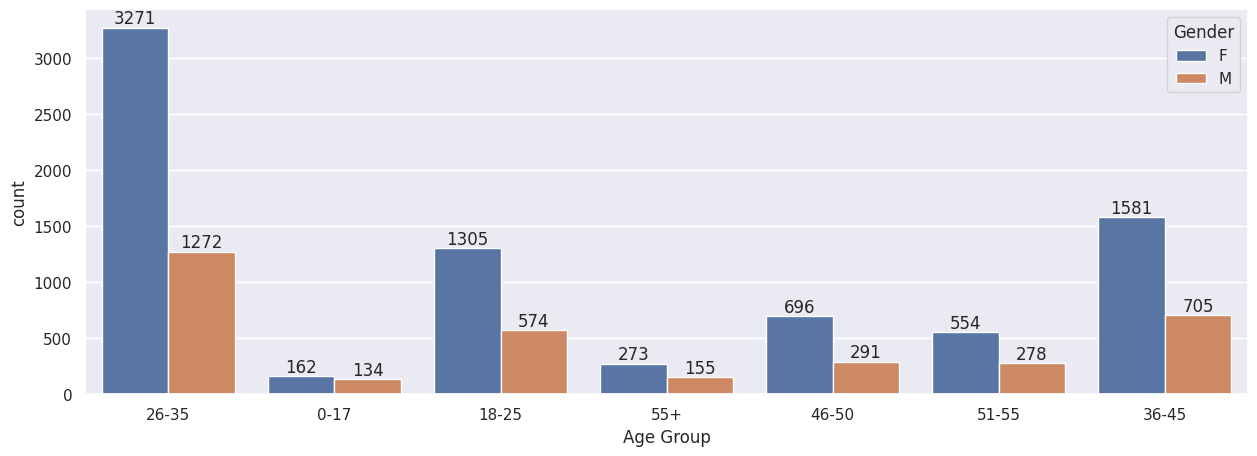

In [23]:
#age_group = df.groupby(['Gender'],as_index=False)['']
ax = sns.countplot(x='Age Group',hue='Gender',data=df)

for bars in ax.containers:
  ax.bar_label(bars)

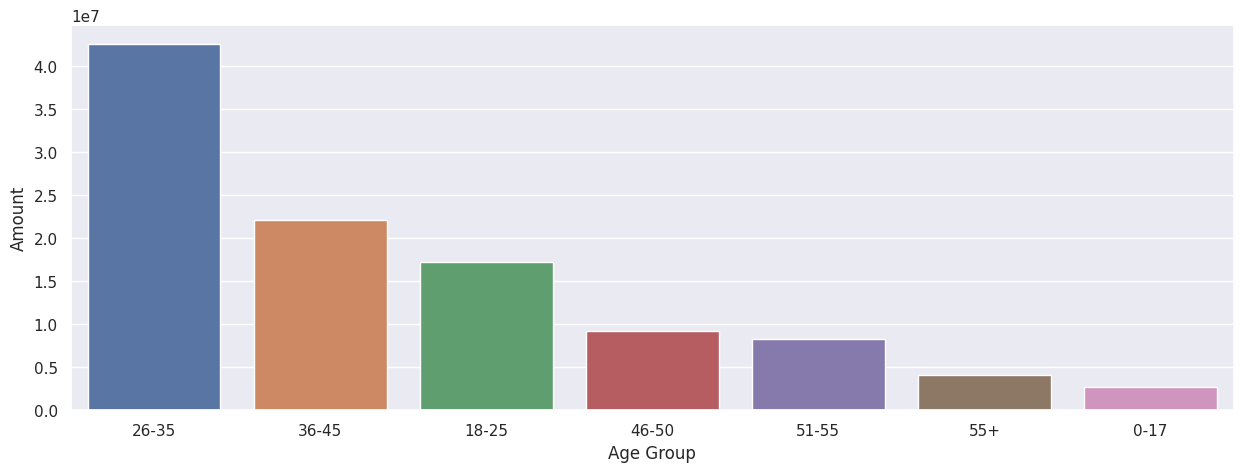

In [24]:
Age_G = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data=Age_G);

### Observation: From above graph we can say
1. People from age_group 26-35 bought more products than others specially Female of this age group.
2. Female of age group 36-45, 18-25 bought more products than male of age group of 26-35.

### Marital Status 

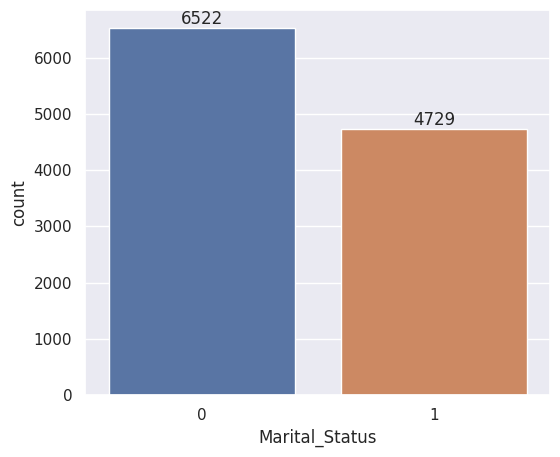

In [30]:
ax = sns.countplot(x='Marital_Status',data = df)
for bars in ax.containers:
  ax.bar_label(bars)

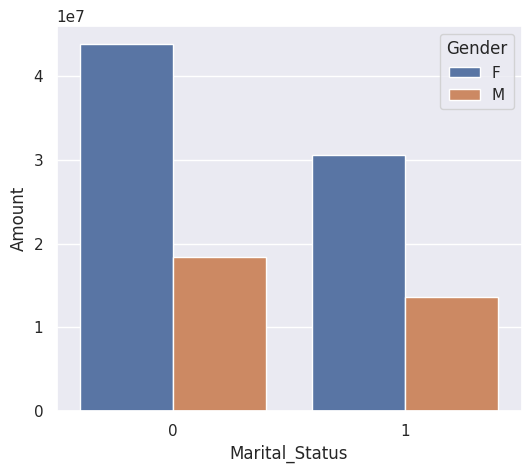

In [28]:
MS = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=MS);

###Observation: From the above graph shows Married Women buy things more than unmarried women.

## Occupation

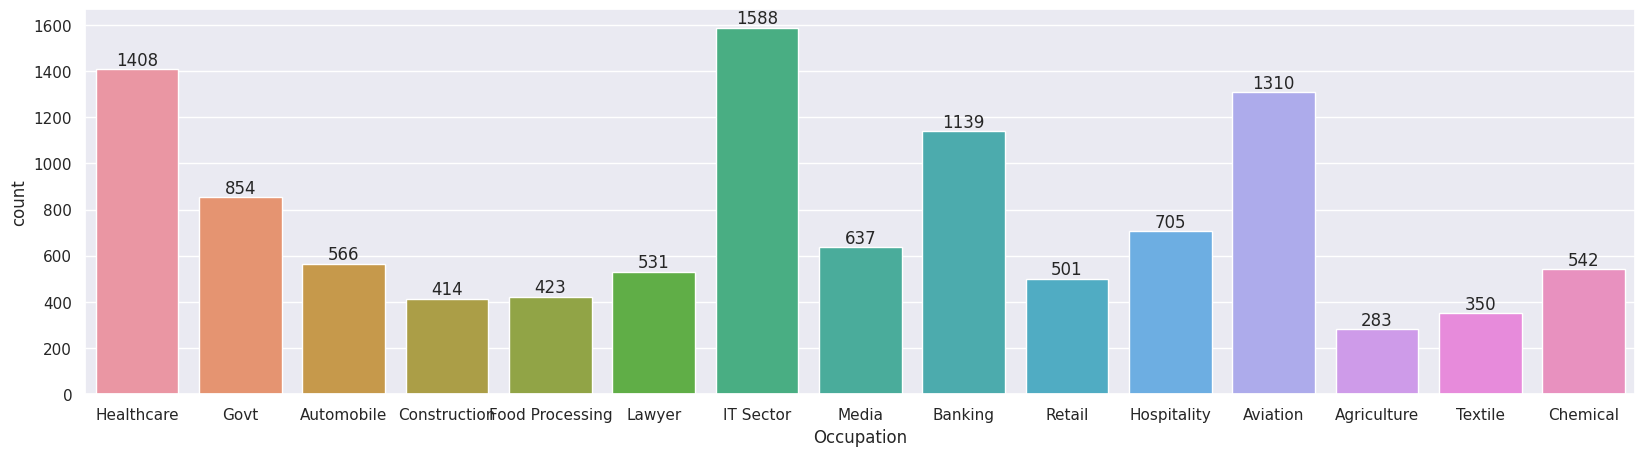

In [39]:
ax = sns.countplot(x='Occupation', data=df)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

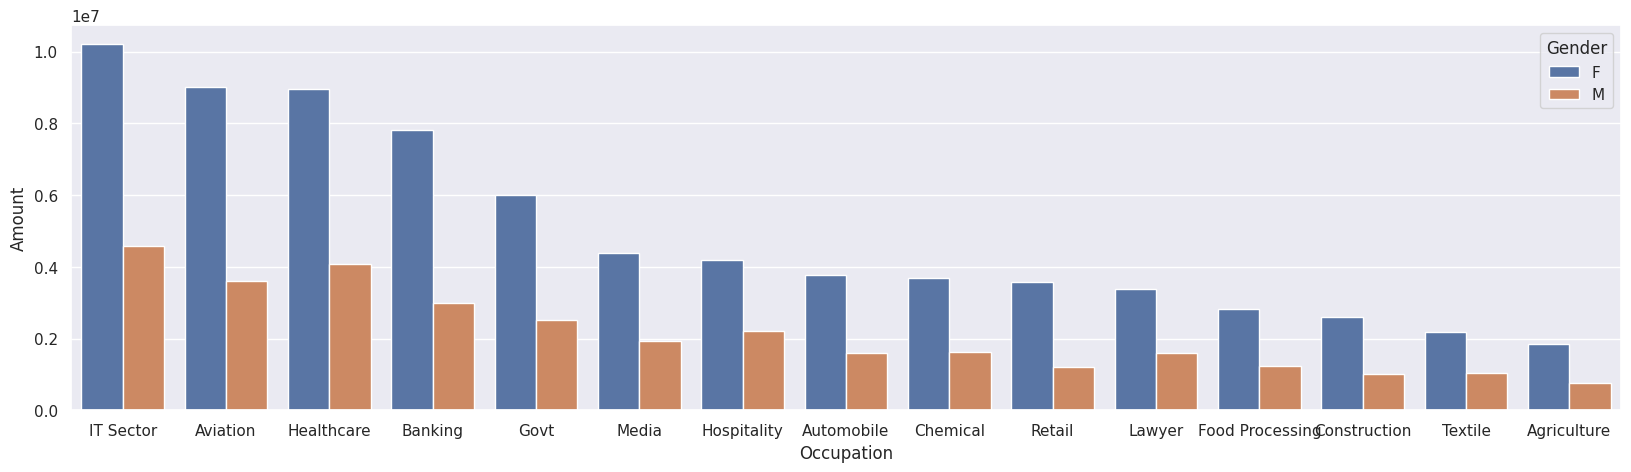

In [42]:
Occ = df.groupby(['Occupation','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Occupation',y='Amount',hue='Gender',data=Occ)

<Axes: xlabel='Occupation', ylabel='Amount'>

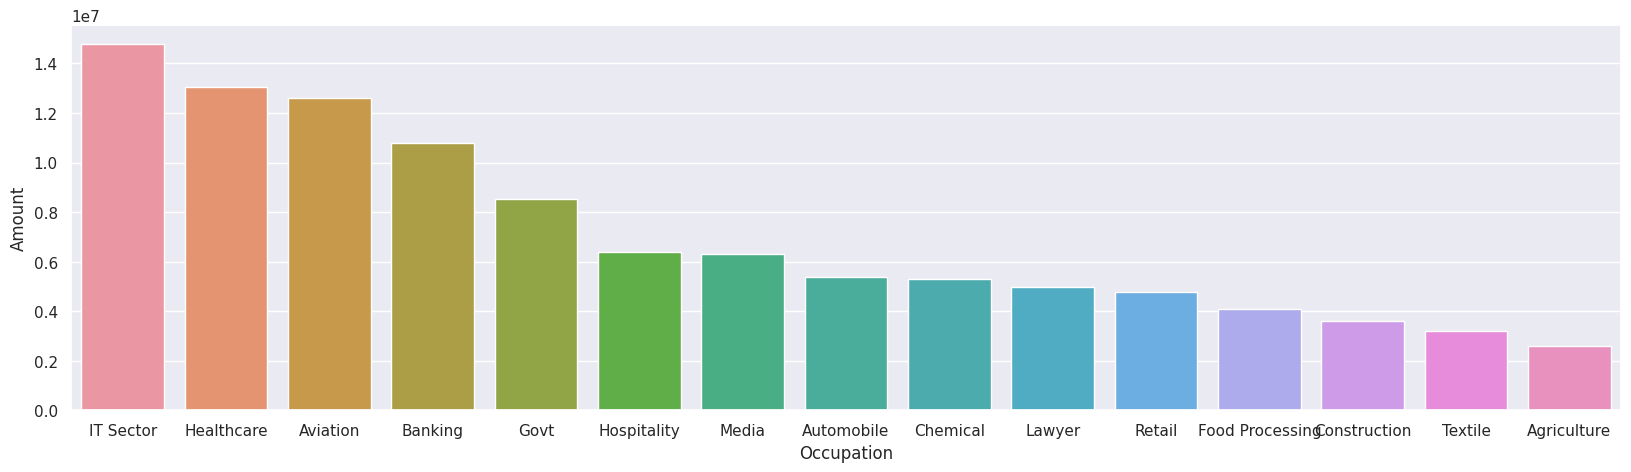

In [43]:
Occ = df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Occupation',y='Amount',data=Occ)

### Observation: 
1. People who are spending most belongs from IT Sector, Healthcare and Aviation.
2. Female from Avitaion sector spend more than from Healthcare Sector.

## Product Category

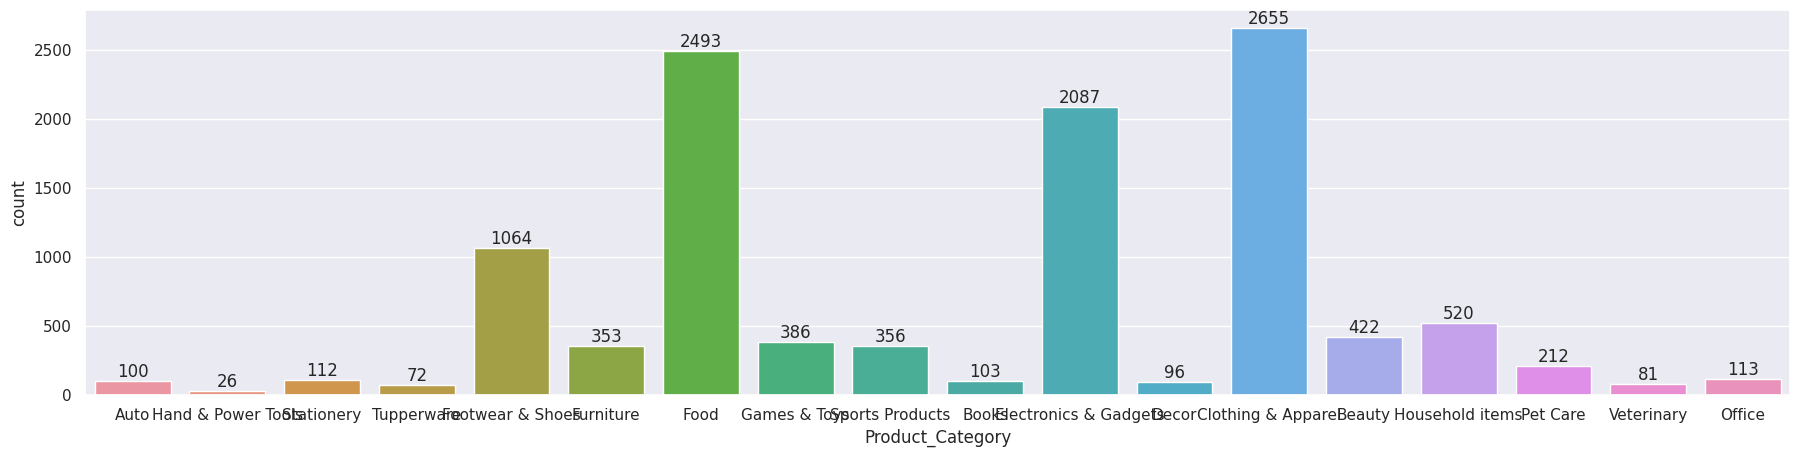

In [48]:
ax = sns.countplot(x='Product_Category',data=df);
sns.set(rc={'figure.figsize':(22,5)})

for bars in ax.containers:
  ax.bar_label(bars)

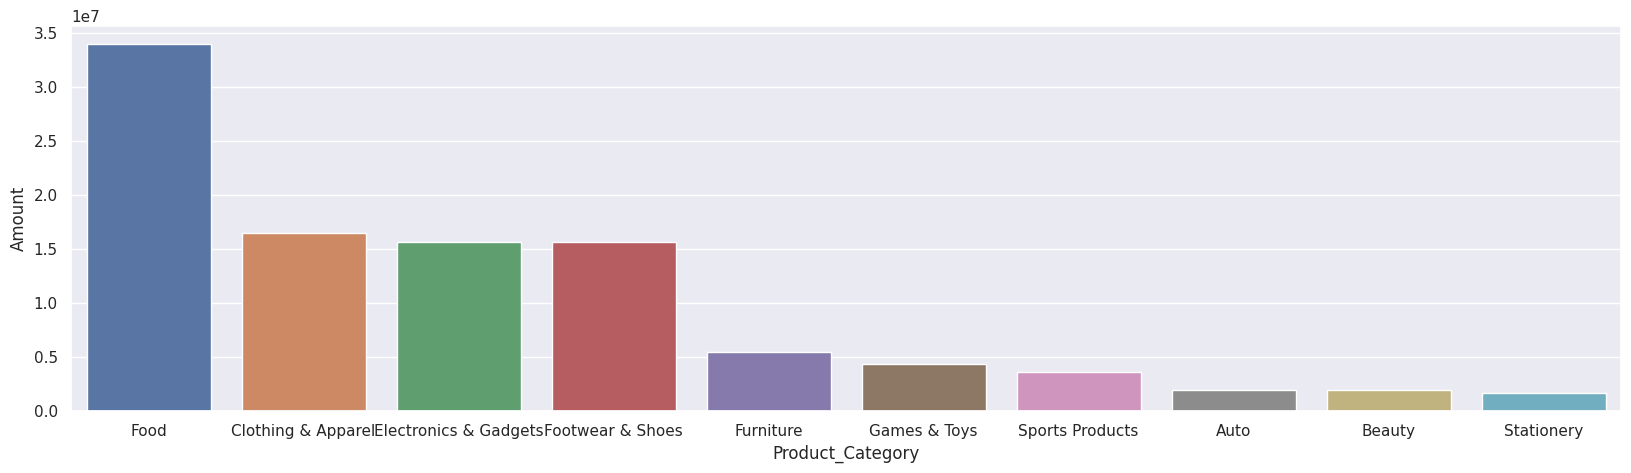

In [53]:
PC = df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category',y='Amount',data=PC);

### Observation: Most Product are bought from Food, Clothing & Apparel, Electronics & Gadgets Category.

## Final Conclusion: Married Women of Age Group 26-35 from UP,Maharashtra, Karnataka bought more Items On Diwali From Food, Clothing & Apparel, Electronics & Gadgets Category and they are mostly working in IT, Healthcare and Aviation Sector.